<a href="https://colab.research.google.com/github/shkabh/HW2/blob/main/citibikes_td_bin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 you should design your own investigation into the citibike data.
- # Come up with a question about the Citibike data usage. It can be anything that involves Categorical data.
At this point of the class it is easier to run tests of proportions or similar, and work with categorical data. Categorical cn be anhything that can be punt into classes (e.g. day/night, male/female, 2014/2015/2016.... as long as you set up your experiment the proper way!)
- # Choose the significance threshold
- # Clearly state they Null and Alternate hypothesis (in words and a math formula)
- # Wrangle the data so that it is ready for your analysis.
- # Explore the data statistical properties (mean, standard deviation...)
- # Answer your question with a Z test
- # Answer your question with a xhi square test of proportions

In [2]:
from __future__  import print_function, division
import pylab as plt
import pandas as pd
import numpy as np

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# IDEA:

## People who are younger than 40 years old (_yfourty_) are more likely than people who are older than 40 years old (_ofourty_) to choose biking _for long durations_ in a single trip.

may change the age threshold to 45

# NULL HYPOTHESIS:
## The proportion of _yfourty_ biking for longer durations is _more_ than the proportion of _ofourty_ biking for longer durations during a single trip.

## The proportion of _ofourty_ biking for longer durations is _the same_ or _higher_ than the proportion of _yfourty_ biking for longer durations during a single trip.

# _$H_0$_ : $\frac{Y_{\mathrm{durations}}}{Y_{\mathrm{total}}} <= \frac{O_{\mathrm{durations}}}{O_{\mathrm{total}}}$
# _$H_1$_ : $\frac{Y_{\mathrm{durations}}}{Y_{\mathrm{total}}} > \frac{O_{\mathrm{durations}}}{O_{\mathrm{total}}}$

or identically:

# _$H_0$_ : $\frac{Y_{\mathrm{durations}}}{Y_{\mathrm{total}}} <= \frac{O_{\mathrm{durations}}}{O_{\mathrm{total}}} <= 0 $
# _$H_1$_ : $\frac{Y_{\mathrm{durations}}}{Y_{\mathrm{total}}} <= \frac{O_{\mathrm{durations}}}{O_{\mathrm{total}}} > 0$
## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

# THIS IS NHRT REQUIRES A TEST FOR DIFFERENCE OF PROPORTIONS:
Z test for unpaired data

https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Mostly_Harmless_Statistics_(Webb)/09:_Hypothesis_Tests_and_Confidence_Intervals_for_Two_Populations/9.03:_Two_Proportion_Z-Test_and_Confidence_Interval

## I am starting with a single month of data:  reading data from citibike csv file from May 2024

what I want is the date and time of the beginning of each trip. pandas has an easy method to read csv files, and an easy method to convert strinds to dates.

if i read a csv file with pandas the content is stored in a "DataFrame". You can think of it as a python dictionary in many ways,but it has many added capabilities: it is easy to convert variables within it, it knows how to plot itself, etc.

In [3]:

import pandas as pd
import zipfile
import requests
from io import BytesIO

In [4]:

datestring = '2019'

# Define the URL of the zip file
url = "https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip"

# Download the zip file
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))



In [5]:
zip_file.extractall() #extract all the files in the zipped folder locally

I am going to look in the now local files (extracted with the command above) to find what I want

In [6]:
!ls

2019-citibike-tripdata	__MACOSX  sample_data


In [7]:
!ls 2019-citibike-tripdata40.7635217, -73.9852150

ls: invalid option -- '7'
Try 'ls --help' for more information.


In [8]:
!ls 2019-citibike-tripdata/5_May

201905-citibike-tripdata_1.csv	201905-citibike-tripdata_2.csv


In [9]:
# Read the CSV file from the zip file
cbMay19 = pd.read_csv(datestring + '-citibike-tripdata/5_May/' + datestring + '05-citibike-tripdata_1.csv')

In [10]:
cbMay19.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1


In [11]:
cbMay19.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [12]:
#add a datetime object
cbMay19["date"] = pd.to_datetime(cbMay19.starttime)

In [13]:
#clean up
cbMay19.drop(columns=['start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender'], inplace=True)

In [14]:
cbMay19.head()

,tripduration,starttime,stoptime,birth year,date
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,1983,2019-05-01 00:00:01.901
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,1969,2019-05-01 00:00:03.021
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,1978,2019-05-01 00:00:04.627
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,1997,2019-05-01 00:00:19.334
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,1967,2019-05-01 00:00:22.184


In [15]:
cbMay19['tripduration'].mean()

1010.644336

In [16]:
cbMay19['tripduration'].median()

618.0

In [20]:
min = cbMay19['tripduration'].min()
max = cbMay19['tripduration'].max()
min, max

(61, 2922656)

### Lets put the trip duration values into bins so they become categorical data. The trip duration values are given in seconds. The bins will be 5 minutes each. Since there are 300 seconds in 5 minutes, that will be the distance between each bin. For sake of space, the last specific number would be 3600 seconds, or 1 hour. Everything above 1 hour will be put into its own bin.
### In the future, keeping the trip duration as a continuous variable would be best.

### Lets separate people < 40 (_yfourty_) from people >= 40 (_ofourty_) to test the hypotheses.
### In this csv file, we have to calculate this from the user's birth year. To be in the _yfourty_ bin, a user must have been born after 1984. To be in the _ofourty_ bin, a user must have been born in 1984 or before.

### birth year == 1 is yfourty, birth year == 2 is ofourty (0 is missing value)

### Lets plot the number of trips per length of trip

In [23]:
bins = [0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600, 2922656]
cbMay19['td_bin'] = pd.cut(cbMay19['tripduration'], bins)
#cbMay19.head()

,tripduration,starttime,stoptime,birth year,date,td_bin
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,1983,2019-05-01 00:00:01.901,"(0, 300]"
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,1969,2019-05-01 00:00:03.021,"(600, 900]"
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,1978,2019-05-01 00:00:04.627,"(2100, 2400]"
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,1997,2019-05-01 00:00:19.334,"(0, 300]"
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,1967,2019-05-01 00:00:22.184,"(0, 300]"


<ipython-input-77-ce92ccf3b265>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_yfourty = cbMay19_yfourty['td_bin'].groupby([cbMay19_yfourty.td_bin]).count()
<ipython-input-77-ce92ccf3b265>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_ofourty = cbMay19_ofourty['td_bin'].groupby([cbMay19_ofourty.td_bin]).count()


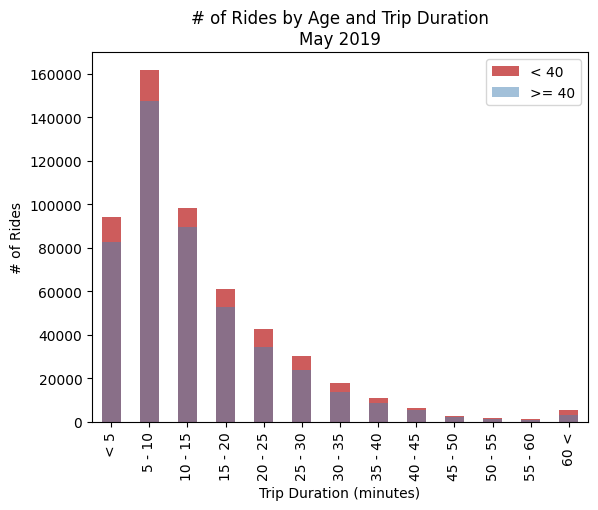

In [77]:
#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas

cbMay19_yfourty = cbMay19[cbMay19['birth year'] < 1984].drop(["birth year"], axis=1)
counts_yfourty = cbMay19_yfourty['td_bin'].groupby([cbMay19_yfourty.td_bin]).count()
#cbMay19_w = cbMay19[cbMay19['gender'] == 2].drop(["gender"], axis=1)
#counts_w = cbMay19_w['date'].groupby([cbMay19_w.date.dt.weekday]).count()

ax = counts_yfourty.plot(kind="bar",
                                                                        color='IndianRed',
                                                                        label='< 40')
cbMay19_ofourty = cbMay19[cbMay19['birth year'] >= 1984].drop(["birth year"], axis=1)
counts_ofourty = cbMay19_ofourty['td_bin'].groupby([cbMay19_ofourty.td_bin]).count()

ax = counts_ofourty.plot(kind="bar",
                                                                        color='SteelBlue',
                                                                        alpha=0.5,
                                                                        label='>= 40', ax=ax)

tmp = ax.xaxis.set_ticklabels(['< 5', '5 - 10', '10 - 15', '15 - 20', '20 - 25', '25 - 30',
                               '30 - 35', '35 - 40', '40 - 45', '45 - 50', '50 - 55', '55 - 60', '60 <'])
plt.legend();
plt.title("# of Rides by Age and Trip Duration\nMay 2019");
plt.ylabel("# of Rides");
plt.xlabel("Trip Duration (minutes)");

The purple shows where the colors overlap. From what I can see with my eyes, there are more trips made by people < 40 trips than >= 40. The top of the purple is the number of trips by >=40, and the top of the red is the number of trips made by < 40.

## Figure 1a: Distribution of Citibike bikers by age in May 2019, absolute counts

In [38]:

norm_yfourty = len(cbMay19_yfourty)
error_yfourty = cbMay19_yfourty["td_bin"].groupby(cbMay19_yfourty.td_bin).count().std()
#eweekend_yfourty = cbMay19_yfourty["td_bin"].groupby(cbMay19_yfourty.td_bin).count().std()
norm_yfourty, error_yfourty
#eweekend_yfourty

<ipython-input-38-52aa97d68948>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_yfourty = cbMay19_yfourty["td_bin"].groupby(cbMay19_yfourty.td_bin).count().std()


(533895, 49792.32199654573)

In [39]:

norm_ofourty = len(cbMay19_ofourty)
error_ofourty = cbMay19_ofourty["td_bin"].groupby(cbMay19_ofourty.td_bin).count().std()
#eweekend_ofourty = cbMay19_ofourty["date"][cbMay19_ofourty.date.dt.weekday >= 5].groupby(cbMay19_ofourty.date.dt.date).count().std()
norm_ofourty, error_ofourty
#eweekend_ofourty

<ipython-input-39-09f7c226f4ff>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_ofourty = cbMay19_ofourty["td_bin"].groupby(cbMay19_ofourty.td_bin).count().std()


(466105, 45406.89220289846)

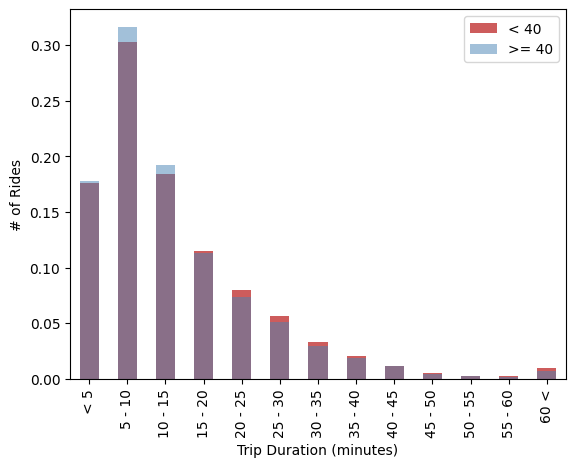

In [41]:
ax=((counts_yfourty) / norm_yfourty).plot(kind="bar",color='IndianRed', label='< 40')
(counts_ofourty / norm_ofourty).plot(kind="bar", alpha=0.5,
                           color='SteelBlue', label='>= 40', ax=ax)
ax.xaxis.set_ticklabels(['< 5', '5 - 10', '10 - 15', '15 - 20', '20 - 25', '25 - 30', '30 - 35', '35 - 40', '40 - 45', '45 - 50', '50 - 55', '55 - 60', '60 <'])
ax.set_ylabel ("# of Rides")
ax.set_xlabel ("Trip Duration (minutes)")
plt.legend();


Again, the purple shows where the colors overlap. However, this time, more people >= 40 made trips less than 15 minutes than people < 40.

## Figure 2: Distribution of Citibike bikers by age in May 2019, normalized

we can add up the weekend days and normalize by the totals, then this becomes a test of proportions, (like the one seen in the [employment notebook](https://github.com/fedhere/UInotebooks/blob/master/hypothesistesting/effectivenes%20of%20NYC%20Post-Prison%20Employment%20Programs.save.ipynb))

## Set up the test of proportions
### I need the fraction of _yfourty_ that bikes for the duration of the time bins and the fraction that bikes for the duration of the time bins, and the same for _ofourty_.

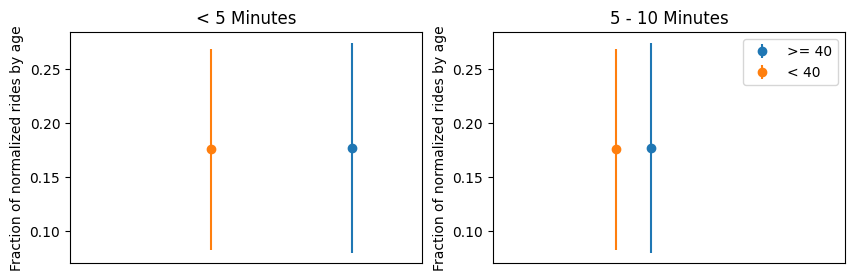

In [71]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

five_yfourty = sum(counts_yfourty[1]) * 1.0 / norm_yfourty
ten_yfourty = sum(counts_yfourty[2]) * 1.0 / norm_yfourty
fifteen_yfourty = sum(counts_yfourty[3]) * 1.0 / norm_yfourty
twenty_yfourty = sum(counts_yfourty[4]) * 1.0 / norm_yfourty
twentyfive_yfourty = sum(counts_yfourty[5]) * 1.0 / norm_yfourty
thirty_yfourty = sum(counts_yfourty[6]) * 1.0 / norm_yfourty
thirtyfive_yfourty = sum(counts_yfourty[7]) * 1.0 / norm_yfourty
fourty_yfourty = sum(counts_yfourty[8]) * 1.0 / norm_yfourty
fourtyfive_yfourty = sum(counts_yfourty[9]) * 1.0 / norm_yfourty
fifty_yfourty = sum(counts_yfourty[10]) * 1.0 / norm_yfourty
fiftyfive_yfourty = sum(counts_yfourty[11]) * 1.0 / norm_yfourty
sixty_yfourty = sum(counts_yfourty[12]) * 1.0 / norm_yfourty
sixtyplus_yfourty = sum(counts_yfourty[13]) * 1.0 / norm_yfourty

#week_yfourty = sum(counts_yfourty[:-2]) * 1.0 / norm_yfourty  #fraction of yfourty riding on week days
#weekend_yfourty = sum(counts_yfourty[-2:]) * 1.0 / norm_yfourty  #fraction of yfourty riding on weekends
eweek_yfourty = error_yfourty / norm_yfourty  #error on fraction number of yfourty riding on week days
#eweekend_yfourty = eweekend_yfourty / norm_yfourty #error on fraction number of yfourty riding on weekends

#same nomenclature as above
#week_m = sum(counts_m[:-2]) * 1.0 / norm_m
#weekend_m = sum(counts_m[-2:]) * 1.0 / norm_m
eweek_ofourty= error_ofourty / norm_ofourty  #error on fraction number of men riding on week days
#eweekend_m = eweekend_m / norm_m #error on fraction number of men riding on weekends

five_ofourty = sum(counts_ofourty[1]) * 1.0 / norm_ofourty
ten_ofourty = sum(counts_ofourty[2]) * 1.0 / norm_ofourty
fifteen_ofourty = sum(counts_ofourty[3]) * 1.0 / norm_ofourty
twenty_ofourty = sum(counts_ofourty[4]) * 1.0 / norm_ofourty
twentyfive_ofourty = sum(counts_ofourty[5]) * 1.0 / norm_ofourty
thirty_ofourty = sum(counts_ofourty[6]) * 1.0 / norm_ofourty
thirtyfive_ofourty = sum(counts_ofourty[7]) * 1.0 / norm_ofourty
fourty_ofourty = sum(counts_ofourty[8]) * 1.0 / norm_ofourty
fourtyfive_ofourty = sum(counts_ofourty[9]) * 1.0 / norm_ofourty
fifty_ofourty = sum(counts_ofourty[10]) * 1.0 / norm_ofourty
fiftyfive_ofourty = sum(counts_ofourty[11]) * 1.0 / norm_ofourty
sixty_ofourty = sum(counts_ofourty[12]) * 1.0 / norm_ofourty
sixtyplus_ofourty = sum(counts_ofourty[13]) * 1.0 / norm_ofourty

'''
print("Men: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_m, weekend_m, eweek_m, eweekend_m))
print("Women: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_w, weekend_w, eweek_w, eweekend_w))
'''
ax1.errorbar([0.4], [five_ofourty], yerr=[eweek_ofourty], fmt='o', label='>= 40')
ax1.errorbar([0.2], [five_yfourty], yerr=[eweek_yfourty], fmt='o', label='< 40')
ax1.set_xlim(0, 1)
ax2.errorbar([0.4], [ten_ofourty], yerr=[eweek_ofourty], fmt='o', label='>= 40')
ax2.errorbar([0.2], [ten_yfourty], yerr=[eweek_yfourty], fmt='o', label='< 40')
ax1.set_xlim(0, 0.5)
ax1.set_title("< 5 Minutes")
ax2.set_title("5 - 10 Minutes")
ax2.set_ylabel("Fraction of normalized rides by age")
ax1.set_ylabel("Fraction of normalized rides by age")
ax1.set_xticks([])
ax2.set_xticks([])
plt.xlim(-0.5, 1.5)
plt.legend();

## Figure 3: Fraction of Citibike bikers per gender in May 2019 for week days (left) and weekends (right)

### Is the percentage of people < 40 that ride for longer durations lower or equal to that of people >= 40?

## The statistics is:
# $z = \frac{(p_0 - p_1)}{SE} $
# $p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$
# $SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$


In [72]:
P0mP1 = ten_yfourty - ten_ofourty
print ("difference between < 40 and >= 40 for a trip duration between 5 - 10 minutes {:.2f}".format(P0mP1))
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between < 40 and >= 40 for a trip duration between 5 - 10 minutes -0.00
In accordance with Null Hypothesis


### Is this difference statistically significant?

In [73]:
# defining the functions that calculate the statistics
# the lambda style definition is NOT APPROVED BY PEP8 and you should avoind it
# but I am putting it here since you may encounter it in your coding life.
# confront the equation in the markdown cell above with these function to understand as they work

def ztest_p(p0, p1, n0, n1):
  return (p0 * n0 + p1 * n1) / (n0 + n1)
def ztest_se(p0, p1, n0, n1):
  p = ztest_p(p0, p1, n0, n1)
  return np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
def zscore(p0, p1, n0, n1) :
  return (p0 - p1) / ztest_se(p0, p1, n0, n1)

# calculations

z = zscore(ten_yfourty, ten_ofourty, norm_yfourty, norm_ofourty)
print ("The z statistics is %.2f"%z)

The z statistics is -2.01


## The largest number reported in  z stats tables is (thpically) 3, which gives  a p value
## $p <0.0002$, which is smaller then my chosen $\alpha=0.05$ - so yes, it is statistically significant (by a lot!)

# We reject the Null Hypothesis that man are more likely to commute than women $p< 0.05$


# Let's check the _effect size_:
# there are 2 formulae I find in the literature
# $r = \frac{z}{\sqrt{(n_0+n_1)}}$
# and
# $h =  2 (\arcsin \sqrt{p_0} -  \arcsin \sqrt{p_1} )$. https://en.wikipedia.org/wiki/Cohen%27s_h

In [74]:
def r_effectsize (z, n0, n1) :
  return z / np.sqrt(n0 + n0)
def h_effectsize (p0, p1):
  return 2 * (np.arcsin(np.sqrt(p0)) - np.arcsin(np.sqrt(p1)))

In [75]:
r = r_effectsize(z, norm_yfourty, norm_ofourty)
print ('r effect size {:.2f}'.format(r))

r effect size -0.00


In [76]:
h = h_effectsize(ten_yfourty, ten_ofourty)
print ("Cohen's h effect size {:.2f}".format(h))

Cohen's h effect size -0.00


# In all these cases we have SMALL EFFECT SIZE